In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
df = pd.read_excel("C:/Users/Sowmya Ganesh/New_Datasets/EastWestAirlines.xlsx",sheet_name='data')
df.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
cluster_data = df[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award"]]
cluster_data.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
km = KMeans(n_clusters=5)
km.fit(cluster_data)

C:\Users\Sowmya Ganesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [5]:
cluster_data.shape

(3999, 11)

In [6]:
pred = km.predict(cluster_data)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
# KMeans clustering to choose the optimum cluster
import matplotlib.pyplot as plt
cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = [] 

for c in cluster_range:
    kmeans = KMeans(n_clusters=c,random_state=0).fit(cluster_data)
    inertias.append(kmeans.inertia_)

C:\Users\Sowmya Ganesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sowmya Ganesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sowmya Ganesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sowmya Ganesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

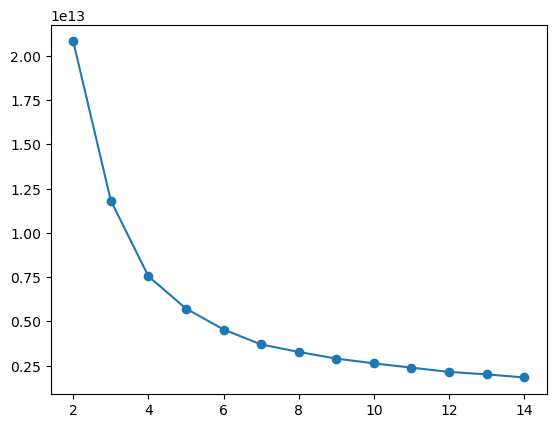

In [8]:
#To find the elbow value
plt.figure()
plt.plot(cluster_range,inertias,marker = 'o')
plt.show()
#here 5 can be chosen as elbow value

In [9]:
kmeans.cluster_centers_

array([[1.40398583e+04, 5.85157013e+01, 1.22330775e+00, 1.01535241e+00,
        1.00000000e+00, 4.08654501e+03, 6.70900209e+00, 1.79325192e+02,
        5.84089323e-01, 3.49348569e+03, 2.67271458e-01],
       [1.89260822e+05, 3.93477157e+02, 2.91370558e+00, 1.01015228e+00,
        1.00000000e+00, 3.11531523e+04, 1.77309645e+01, 9.79035533e+02,
        2.67005076e+00, 4.89476142e+03, 4.61928934e-01],
       [6.87876375e+05, 2.91625000e+02, 3.43750000e+00, 1.00000000e+00,
        1.18750000e+00, 5.23617500e+04, 2.35625000e+01, 1.75437500e+03,
        6.62500000e+00, 6.14118750e+03, 8.12500000e-01],
       [8.89945000e+05, 2.04800000e+02, 3.40000000e+00, 1.00000000e+00,
        1.00000000e+00, 9.38898000e+04, 1.82000000e+01, 1.23000000e+03,
        3.60000000e+00, 6.13420000e+03, 1.00000000e+00],
       [8.03590036e+04, 9.34580292e+01, 2.37591241e+00, 1.00912409e+00,
        1.00182482e+00, 1.75659708e+04, 1.34105839e+01, 4.56381387e+02,
        1.30291971e+00, 4.28314781e+03, 3.17518248e-

In [10]:
inertias

[20823632642041.957,
 11825165636648.486,
 7549630961801.499,
 5724556335991.396,
 4541450673874.508,
 3697365737423.7446,
 3272288036938.7407,
 2897687137592.3804,
 2628014971809.6567,
 2386030060933.846,
 2144220337607.9856,
 2005965043739.7998,
 1830000446751.3462]

In [11]:
cluster_data['cluster'] = pred
cluster_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

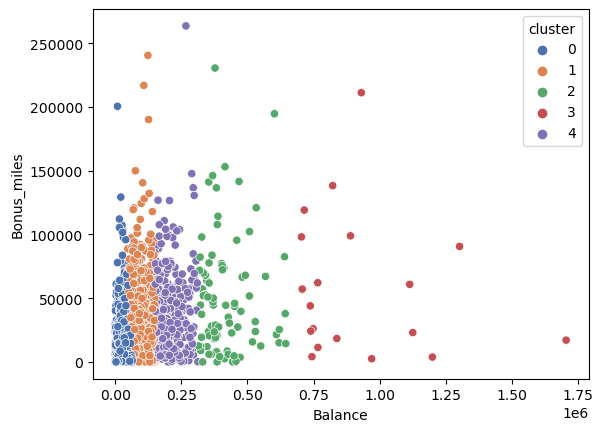

In [12]:
sns.scatterplot(y= 'Bonus_miles',x='Balance',hue='cluster',data=cluster_data,palette='deep')

<Axes: xlabel='Flight_miles_12mo', ylabel='Balance'>

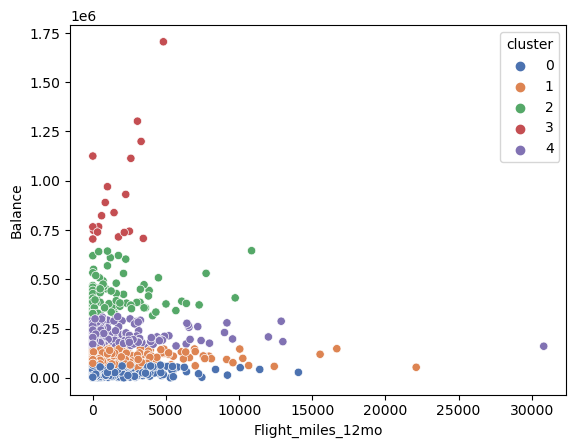

In [13]:
sns.scatterplot(y= 'Balance',x='Flight_miles_12mo',hue='cluster',data=cluster_data,palette='deep')

<Axes: xlabel='Days_since_enroll', ylabel='Balance'>

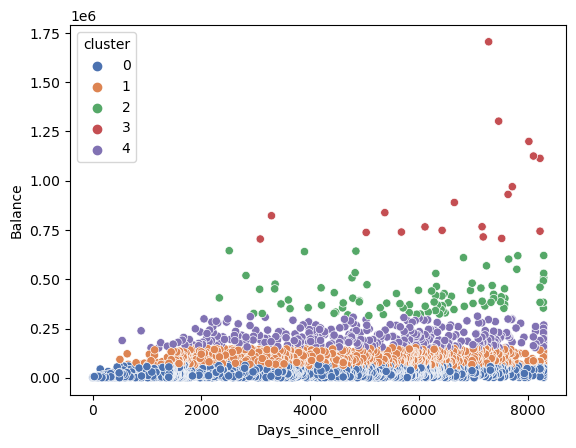

In [14]:
sns.scatterplot(y= 'Balance',x='Days_since_enroll',hue='cluster',data=cluster_data,palette='deep')